<a href="https://colab.research.google.com/github/AtsushiNi/myLeprecon/blob/master/niihama/motor_misalignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## モーターの精度を信用しずらかったので、計測してみた
水素-ネオン-水素-ネオンの順でスペクトルを計測<br>
複数回の計測で値がズレていないかを見てみた

In [6]:
%pylab inline
!pip install netcdf4

import os
from os.path import join
import xarray as xr
import numpy as np
import pandas as pd
from pandas import read_csv
from google.colab import drive

drive.mount('/content/drive')

Populating the interactive namespace from numpy and matplotlib
Mounted at /content/drive


In [ ]:
data_path = join('drive', 'My Drive', '研究室', 'MyLeprecon', 'SpectrometerData', '20201020')

# ファイル名のリスト
H_1 = [f'H-1_{430000 + 5000*i}.nc' for i in range(10)]
H_3 = [f'H-3_{430000 + 5000*i}.nc' for i in range(10)]
Ne_2 = [f'Ne-2_{430000 + 5000*i}.nc' for i in range(10)]
Ne_4 = [f'Ne-4_{430000 + 5000*i}.nc' for i in range(10)]

# overlapの関数(他のデータを元にしているので甘い)
index = np.array([415000,460000, 490000, 550000, 600000])
overlap = np.array([1040, 1000, 978, 954, 930])
overlap_func = np.poly1d(np.polyfit(index, overlap, 2))

x_range = np.arange(2048)
overlap = 0
for i,fp in enumerate(H_1):
    c = 'k'
    if i%2: c = 'C1'
    image_data = xr.open_dataset(join(data_path,fp)).to_array()[0]
    
    overlap = overlap + overlap_func(430000 + 5000 * i)
    x = x_range + overlap
    y = image_data.sum(axis=0)
    plot(y / 1e2, x, f'{c}')

grid()
yscale('log')
xlabel('pixel')
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,100])


(700.0, 720.0)

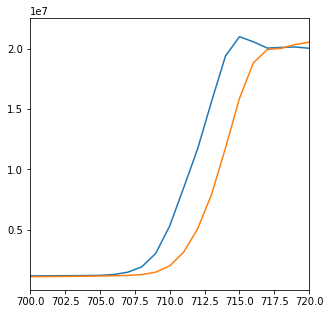

In [70]:
Ne_2_image_data = xr.open_dataset(join(data_path, 'Ne-2_450000.nc')).to_array()[0]
Ne_4_image_data = xr.open_dataset(join(data_path, 'Ne-4_450000.nc')).to_array()[0]
y2 = Ne_2_image_data.sum(axis=0)
y4 = Ne_4_image_data.sum(axis=0)
plot(x_range, y2)
plot(x_range, y4)

fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([5,5])

xlim(700, 720)

## 計測結果
2ピクセル程度ずれる可能性はあった

## このデータで水素スペクトルのcalibration

### ずれの計算


In [ ]:
x_range = np.arange(2048)

image_data_1 = xr.open_dataset(join(data_path,'Ne-2_430000.nc')).to_array()[0]
image_data_2 = xr.open_dataset(join(data_path,'Ne-2_435000.nc')).to_array()[0]

y_1 = image_data_1.sum(axis=0)
y_2 = image_data_2.sum(axis=0)

plot(x_range, y_1)
plot(x_range+1019.5, y_2)

xlim(1447, 1475)

In [ ]:
x_range = np.arange(2048)

image_data_1 = xr.open_dataset(join(data_path,'Ne-2_440000.nc')).to_array()[0]
image_data_2 = xr.open_dataset(join(data_path,'Ne-2_445000.nc')).to_array()[0]

y_1 = image_data_1.sum(axis=0)
y_2 = image_data_2.sum(axis=0)

plot(x_range, y_1)
plot(x_range+1019, y_2)

xlim(1080, 1120)

In [ ]:
x_range = np.arange(2048)

image_data_1 = xr.open_dataset(join(data_path,'Ne-2_445000.nc')).to_array()[0]
image_data_2 = xr.open_dataset(join(data_path,'Ne-2_450000.nc')).to_array()[0]

y_1 = image_data_1.sum(axis=0)
y_2 = image_data_2.sum(axis=0)

plot(x_range, y_1)
plot(x_range+1016.7, y_2)

xlim(1720, 1750)

In [ ]:
x_range = np.arange(2048)

image_data_1 = xr.open_dataset(join(data_path,'Ne-2_450000.nc')).to_array()[0]
image_data_2 = xr.open_dataset(join(data_path,'Ne-2_455000.nc')).to_array()[0]

y_1 = image_data_1.sum(axis=0)
y_2 = image_data_2.sum(axis=0)

plot(x_range, y_1)
plot(x_range+1000, y_2)

xlim(1880, 1920)

In [ ]:
x_range = np.arange(2048)

image_data_1 = xr.open_dataset(join(data_path,'Ne-2_460000.nc')).to_array()[0]
image_data_2 = xr.open_dataset(join(data_path,'Ne-2_465000.nc')).to_array()[0]

y_1 = image_data_1.sum(axis=0)
y_2 = image_data_2.sum(axis=0)

plot(x_range, y_1)
plot(x_range+997, y_2)

xlim(1600, 1655)

In [ ]:
x_range = np.arange(2048)

image_data_1 = xr.open_dataset(join(data_path,'Ne-2_465000.nc')).to_array()[0]
image_data_2 = xr.open_dataset(join(data_path,'Ne-2_470000.nc')).to_array()[0]

y_1 = image_data_1.sum(axis=0)
y_2 = image_data_2.sum(axis=0)

plot(x_range, y_1)
plot(x_range+1001.1, y_2)

xlim(1680, 1725)

In [ ]:
x_range = np.arange(2048)

image_data_1 = xr.open_dataset(join(data_path,'Ne-2_470000.nc')).to_array()[0]
image_data_2 = xr.open_dataset(join(data_path,'Ne-2_475000.nc')).to_array()[0]

y_1 = image_data_1.sum(axis=0)
y_2 = image_data_2.sum(axis=0)

plot(x_range, y_1)
plot(x_range+994, y_2)

xlim(1150, 1230)

[430000 435000 440000 445000 450000 455000 460000 465000 470000]
[1019.5 1019.3 1019.  1016.7 1000.   998.5  997.  1001.1  994. ]


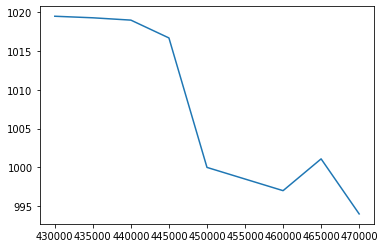

In [16]:
moter = np.array([430000, 435000, 440000, 445000, 450000, 455000, 460000, 465000, 470000])
overlap_array = np.array([1019.5, 1019.3, 1019, 1016.7, 1000, 998.5, 997, 1001.1, 994])
print(moter)
print(overlap_array)
plot(moter, overlap_array)

## 一枚のグラフにして小さい分光器のスペクトルと比較


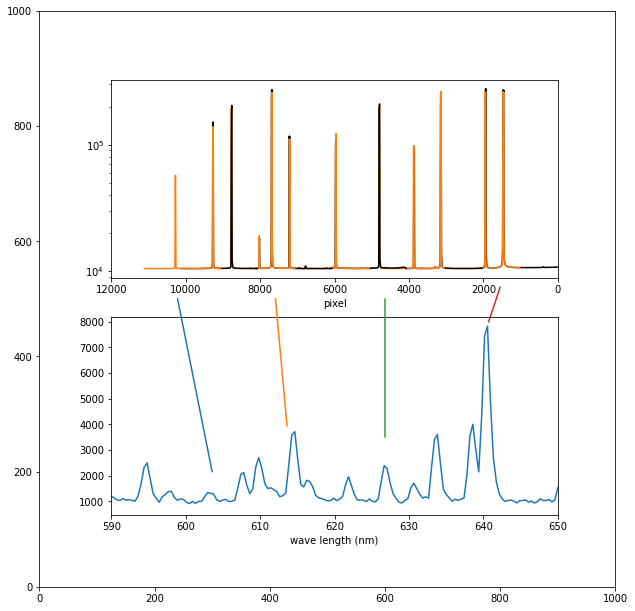

In [68]:
fig = figure(figsize=(8.0, 8.0))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
added_axes = fig.add_axes([0, 0, 1, 1]) #補助線用のaxes

Ne_2 = [f'Ne-2_{430000 + 5000*i}.nc' for i in range(10)]
x_range = np.arange(2048)
overlap = 0
for i,fp in enumerate(Ne_2):
    c = 'k'
    if i%2: c = 'C1'
    image_data = xr.open_dataset(join(data_path,fp)).to_array()[0]

    if i == 0: 
      overlap = 0
    else:
      overlap = overlap + overlap_array[i - 1]
    x = x_range + overlap
    y = image_data.sum(axis=0)
    ax1.plot(x, y / 1e2, f'{c}')
ax1.set(xlabel='pixel', xlim=[12000, 0], yscale='log')

Ne_filepath = join('drive', 'My Drive', '研究室', 'MyLeprecon', 'SpectrometerData', '20201016', 'Ne-spectrum.txt')
ne_csv = read_csv(Ne_filepath, sep=';', skiprows=66)
ne_csv["Wavelength"] = pd.to_numeric(ne_csv["Wavelength"], errors="coerce")
ax2.plot(ne_csv["Wavelength"], ne_csv["Raw data #1"])
ax2.set(xlabel='wave length (nm)', xlim=[590, 650])

added_axes.patch.set_alpha(0)
added_axes.set(xlim=[0, 1000], ylim=[0,1000])
added_axes.plot([240, 300], [500, 200])
added_axes.plot([410, 430], [500, 280])
added_axes.plot([600, 600], [500, 260])
added_axes.plot([800, 780], [520, 460])

## ネオンのcalibration


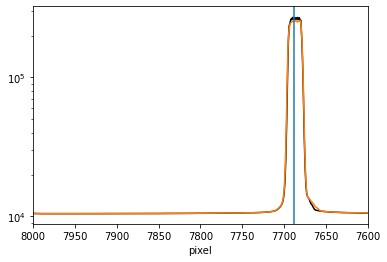

In [121]:
Ne_2 = [f'Ne-2_{430000 + 5000*i}.nc' for i in range(10)]
x_range = np.arange(2048)
overlap = 0
for i,fp in enumerate(Ne_2):
    c = 'k'
    if i%2: c = 'C1'
    image_data = xr.open_dataset(join(data_path,fp)).to_array()[0]

    if i == 0: 
      overlap = 0
    else:
      overlap = overlap + overlap_array[i - 1]
    x = x_range + overlap
    y = image_data.sum(axis=0)
    plot(x, y / 1e2, f'{c}')

xlabel('pixel')
xlim(12000, 0)
yscale('log')

xlim(8000, 7600)
axvline(10277)
axvline(9266)
axvline(8767)
axvline(7688)
axvline(7208)
axvline(5964)

| pixels | wave length(nm) |
| -- | -- |
| 5964 | 622.0 |
| 7208 | 614.5 |
| 7688 | 609.8 |
| 8767 | 607.5 |
| 10277 | 603 |

1nm相当のpixel数: 227.0


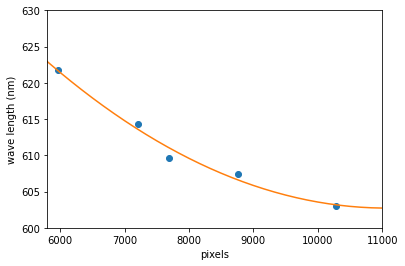

In [123]:
pixels = np.array([10277, 8767, 7688, 7208, 5964])
#wave_length = np.array([603, 607.5, 609.8, 614.5, 622.0])
wave_length_kuzmin = np.array([602.99, 607.43, 609.62, 614.31, 621.73])
plot(pixels, wave_length_kuzmin, 'o')

pixels_to_wave_length_func = np.poly1d(np.polyfit(pixels, wave_length_kuzmin, 2))
x = np.linspace(3500, 20000, 100)
plot(x, pixels_to_wave_length_func(x))

xlabel('pixels')
ylabel('wave length (nm)')
xlim(5800, 11000)
ylim(600, 630)
print("1nm相当のpixel数:", end=' ')
print(-(pixels[0]-pixels[4])/(wave_length[0]-wave_length[4]))